In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets, transforms
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset, DataLoader


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup device-agnostic code
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {DEVICE} device")

Using cpu device


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DL/Kaggle5D/5D_5D.csv")

In [ ]:
df.head()

,Id,x0,x1,x2,x3,x4,y0,y1,y2,y3,y4
0,0,-5.0,-5.0,-5.0,-5.0,-5.0,2.680359e+08,0.949565,3520.756822,-4.128689e+08,2.425720e+08
1,1,-5.0,-5.0,-5.0,-5.0,-4.5,2.680359e+08,0.949565,3482.038246,-4.128689e+08,2.425720e+08
2,2,-5.0,-5.0,-5.0,-5.0,-4.0,2.680359e+08,0.949565,3443.319670,-4.128689e+08,2.425720e+08
3,3,-5.0,-5.0,-5.0,-5.0,-3.5,2.680359e+08,0.949565,3404.601095,-4.128689e+08,2.425720e+08
4,4,-5.0,-5.0,-5.0,-5.0,-3.0,2.680359e+08,0.949565,3365.882519,-4.128689e+08,2.425720e+08


In [ ]:
df_train = df.sample(frac = 0.8)
df_val = df.drop(df_train.index)

In [ ]:
len(df_train), len(df_val)

(3267281, 816820)

In [ ]:
X_train = df_train[["x0","x1","x2","x3","x4"]]
y_train = df_train[['y0','y1','y2','y3','y4']]

X_val = df_val[["x0","x1","x2","x3","x4"]]
y_val = df_val[['y0','y1','y2','y3','y4']]

In [ ]:
X_train = np.float32(X_train)
y_train = np.float32(y_train)
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)

X_val = np.float32(X_val)
y_val = np.float32(y_val)
X_val = torch.tensor(X_val)
y_val = torch.tensor(y_val)

In [ ]:
print(X_train.dtype, X_val.dtype)
print(y_train.shape, y_val.shape)

torch.float32 torch.float32
torch.Size([3267281, 5]) torch.Size([816820, 5])


In [ ]:
x0_mean = df_train['x0'].mean()
x0_std = df_train['x0'].std()
x1_mean = df_train['x1'].mean()
x1_std = df_train['x1'].std()
x2_mean = df_train['x2'].mean()
x2_std = df_train['x2'].std()
x3_mean = df_train['x3'].mean()
x3_std = df_train['x3'].std()
x4_mean = df_train['x4'].mean()
x4_std = df_train['x4'].std()

transform = transforms.Compose([transforms.Normalize((x0_mean, x1_mean, x2_mean, x3_mean, x4_mean),(x0_std, x1_std, x2_std, x3_std, x4_std))])

In [ ]:
class TrainDatasetFromDataFrame(Dataset):

  def __init__(self,inputs, outputs, transform = None):

    self.x=inputs
    self.y=outputs
    self.transform = transform


  def __len__(self):
    return len(self.y)

  def __getitem__(self,idx):
    x = self.x[idx]
    y = self.y[idx]

    if self.transform:
      x = self.transform(x)


    return x,y

In [ ]:
dataset_train = TrainDatasetFromDataFrame(X_train, y_train)
dataloader_train = DataLoader(dataset_train, 10000, True)

dataset_test = TrainDatasetFromDataFrame(X_val, y_val)
dataloader_test = DataLoader(dataset_test, 10000, True)

In [ ]:
dataloader_test.dataset.y.shape

torch.Size([816820, 5])

In [ ]:
def get_datasets_and_dataloaders(batch_size = 1000):
    """
    Load the training and test datasets into data loaders.
    """
    dataframe_train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DL/Kaggle5D/5D_5D.csv')
    df_train = dataframe_train_data.sample(frac = 0.8)


    # Creating dataframe with the rest of the values
    df_test = dataframe_train_data.drop(df_train.index)

    print(len(df_train), len(df_test))

    x0_mean = df_train['x0'].mean()
    x0_std = df_train['x0'].std()
    x1_mean = df_train['x1'].mean()
    x1_std = df_train['x1'].std()
    x2_mean = df_train['x2'].mean()
    x2_std = df_train['x2'].std()
    x3_mean = df_train['x3'].mean()
    x3_std = df_train['x3'].std()
    x4_mean = df_train['x4'].mean()
    x4_std = df_train['x4'].std()

    transform = transforms.Compose([transforms.ToTensor,
                                    transforms.Normalize((x0_mean, x1_mean, x2_mean, x3_mean, x4_mean),(x0_std, x1_std, x2_std, x3_std, x4_std))])


    train_data=TrainDatasetFromDataFrame(df_train[["x0","x1","x2","x3","x4"]],
                                         df_train[['y0','y1','y2','y3','y4']],
                                         transform)
    test_data=TrainDatasetFromDataFrame(df_test[["x0","x1","x2","x3","x4"]],
                                        df_test[['y0','y1','y2','y3','y4']],
                                        transform)

    train_dataloader = DataLoader(
        dataset=train_data,
        batch_size=batch_size,
        shuffle=True  # shuffle the data?
    )

    test_dataloader = DataLoader(
        dataset=test_data,
        batch_size=batch_size,
        shuffle=False
    ) # don't usually need to shuffle testing data


    return train_data, test_data, train_dataloader, test_dataloader

In [ ]:
# Load dataloaders in global variables
TRAIN_DATASET, TEST_DATASET, TRAIN_DATALOADER, TEST_DATALOADER = get_datasets_and_dataloaders(10000)

# We actually don't really need to return the datasets, but it's nice to have them for reference. If you don't,
# you can just return the dataloaders and find the datasets by calling TRAIN_DATALOADER.dataset or TEST_DATALOADER.dataset:
print(TRAIN_DATALOADER.dataset == TRAIN_DATASET)
print(TEST_DATALOADER.dataset == TEST_DATASET)

3267281 816820
True
True


In [ ]:
print(dataloader_train.dataset)

In [ ]:
print(df['x0'].mean())

0.0


### Réseau de neurones

In [ ]:
class Model(nn.Module):
    def __init__(self, hidden_units1, hidden_units2, hidden_units3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(5, hidden_units1)
        self.fc2 = nn.Linear(hidden_units1, hidden_units2)
        self.fc3 = nn.Linear(hidden_units2,hidden_units3)
        self.fc5 = nn.Linear(hidden_units3, out_features=5)

    def forward(self, x):
        x = self.fc1(x)
        x = nn.LeakyReLU(0.01)(x)
        x = self.fc2(x)
        x = nn.LeakyReLU(0.01)(x)
        x = self.fc3(x)
        x = nn.LeakyReLU(0.01)(x)
        x = self.fc5(x)
        return x

In [ ]:
#model = Model(4695,14984,474)
model = Model(500,500,500)
model = model.to(DEVICE)

In [ ]:
from tqdm.auto import tqdm

In [ ]:
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.05)

In [ ]:
model.load_state_dict(torch.load("/content/drive/My Drive/Colab Notebooks/DL/Kaggle5D/5D_last_model.pth"))

RuntimeError: ignored

0


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [1/50], Loss : 2.51e+09
1


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [2/50], Loss : 2.45e+09
2


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [3/50], Loss : 2.44e+09
3


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [4/50], Loss : 2.45e+09
4


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [5/50], Loss : 2.45e+09
5


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [6/50], Loss : 2.44e+09
6


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [7/50], Loss : 2.46e+09
7


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [8/50], Loss : 2.45e+09
8


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [9/50], Loss : 2.44e+09
9


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [10/50], Loss : 2.46e+09
10


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [11/50], Loss : 2.44e+09
11


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [12/50], Loss : 2.44e+09
12


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [13/50], Loss : 2.44e+09
13


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [14/50], Loss : 2.46e+09
14


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [15/50], Loss : 2.46e+09
15


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [16/50], Loss : 2.44e+09
16


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [17/50], Loss : 2.43e+09
17


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [18/50], Loss : 2.45e+09
18


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [19/50], Loss : 2.44e+09
19


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [20/50], Loss : 2.46e+09
20


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [21/50], Loss : 2.45e+09
21


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [22/50], Loss : 2.43e+09
22


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [23/50], Loss : 2.43e+09
23


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [24/50], Loss : 2.47e+09
24


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [25/50], Loss : 2.45e+09
25


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [26/50], Loss : 2.44e+09
26


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [27/50], Loss : 2.46e+09
27


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [28/50], Loss : 2.44e+09
28


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [29/50], Loss : 2.44e+09
29


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [30/50], Loss : 2.47e+09
30


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [31/50], Loss : 2.43e+09
31


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [32/50], Loss : 2.42e+09
32


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [33/50], Loss : 2.32e+09
33


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [34/50], Loss : 2.06e+09
34


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [35/50], Loss : 1.63e+09
35


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [36/50], Loss : 1.33e+09
36


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [37/50], Loss : 1.09e+09
37


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [38/50], Loss : 9.08e+08
38


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [39/50], Loss : 7.49e+08
39


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [40/50], Loss : 6.77e+08
40


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [41/50], Loss : 6.01e+08
41


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [42/50], Loss : 5.90e+08
42


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [43/50], Loss : 5.29e+08
43


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [44/50], Loss : 4.95e+08
44


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [45/50], Loss : 4.98e+08
45


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [46/50], Loss : 4.91e+08
46


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [47/50], Loss : 4.60e+08
47


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [48/50], Loss : 4.51e+08
48


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [49/50], Loss : 4.28e+08
49


  0%|          | 0/327 [00:00<?, ?it/s]

Epoch [50/50], Loss : 4.49e+08
Loss (semilogy):


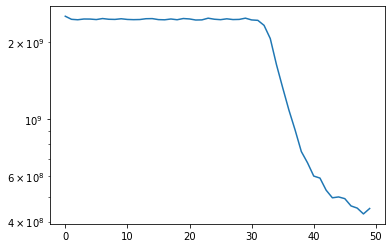

In [ ]:
n_epochs = 50
losses = np.zeros(n_epochs)
#losses[0] = 1

for epoch in range(n_epochs):
    print(epoch)
    loss_tt = 0
    pbar = tqdm(dataloader_train)
    for train_input, train_label in pbar:
                train_input = train_input.to(DEVICE)
                train_label = train_label.to(DEVICE)

                # 1
                optimizer.zero_grad()
                #2
                outputs = model(train_input)
                #3
                loss = criterion(outputs, train_label)
                loss_tt += loss
                #4
                loss.backward()
                #5
                optimizer.step()
                pbar.set_description("Training batch loss %s" % loss.item())

    losses[epoch] = loss_tt / len(dataloader_train)
    print(f'Epoch [{epoch+1}/{n_epochs}], Loss : {losses[epoch].item():.2e}')


print('Loss (semilogy):')
plt.semilogy(losses)
plt.show()

In [ ]:
print('Loss (semilogy):')
plt.semilogy(losses)
plt.show()

Loss (semilogy):


NameError: ignored

In [ ]:
torch.save(model.state_dict(), "/content/drive/My Drive/Colab Notebooks/DL/Kaggle5D/5D_last_model.pth")

NameError: ignored

In [ ]:
loss_tt = 0
pbar = tqdm(dataloader_test)
for train_input, train_label in pbar:
            train_input = train_input.to(DEVICE)
            train_label = train_label.to(DEVICE)

            # 1
            optimizer.zero_grad()
            #2
            outputs = model(train_input)
            #3
            loss = criterion(outputs, train_label)
            loss_tt += loss
            #4
            loss.backward()
            #5
            optimizer.step()
            pbar.set_description("Training batch loss %s" % loss.item())

losses[epoch] = loss_tt / len(dataloader_test)
print(f'Epoch [{epoch+1}/{n_epochs}], Loss : {losses[epoch].item():.2e}')

### predictions

In [ ]:
testset=pd.read_csv("/content/drive/My Drive/Colab Notebooks/DL/Kaggle5D/5D_5D-test_set.csv")


In [ ]:
testset.head()

In [ ]:
X_test = testset[["x0","x1","x2","x3","x4"]]
print(X_test.shape)
X_test = np.float32(X_test)
X_test_tensor=torch.Tensor(X_test).to(DEVICE)


In [ ]:
preds=model(X_test_tensor).to(DEVICE)
preds = preds.cpu().detach().numpy()
#print(preds)
print(type(preds))

In [ ]:
index = 0
predictions = []
for i, pred in enumerate(preds):
    predictions.append({"Id":i,'y0':preds[i][0],'y1':preds[i][0],'y2':preds[i][0],'y3':preds[i][0],'y4':preds[i][0]})
predictions = pd.DataFrame(predictions)
print(predictions)

In [ ]:
predictions.to_csv('/content/drive/My Drive/Colab Notebooks/DL/Kaggle5D/submission_0703_2.csv',index = None)